# Fun with springs

## Objectives:  
1) Damped, Forced Pendulum and Resonance <br>
2) modeling a slinky<br>
3) falling slinky<br>
4) pendulum slinky<br>

As we worked it out last week, and oscillating spring with a mass m will follow: $d \vec p/dt = \vec F_{spring}$ so 
$ \frac{md^2 \vec x}{dt^2}=-k\vec x $
<br>
We can add a damping force $\vec F_{damp}= -2\gamma \frac {d\vec x}{dt}$ and a periodic forcing force $\vec F_{forcing}=\vec F_o cos(w_f t)$ <br>
The resulting equation is (using $w_o^2 = k/m$): 
$$ \frac{d^2 \vec x}{dt^2}=-w_o^2\vec x - \frac {2\gamma}{m} \frac {d\vec x}{dt}+ \frac {\vec F_o}{m} cos(w_f t) $$
that can be written into:
$$ \frac {d\theta}{dt}= w$$ 
$$ \frac {dw}{dt} = -w_o^2\vec x - \frac {2\gamma}{m} \frac {d\vec x}{dt}+ \frac {\vec F_o}{m} cos(w_f t) $$

#### Solving the simple oscillating spring, using Euler and then using Verlet.  $m=1$

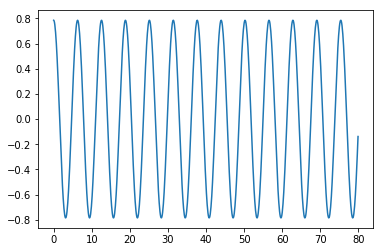

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

dt=.1;   
wo=1. ;
A=1;
gamma=1;
finalTime=80;
noTimeSteps = floor(finalTime/dt) ;
w = np.zeros(noTimeSteps) ;
theta = np.zeros(noTimeSteps);
t=np.zeros(noTimeSteps);
theta0=0;
w0=0;
w[0]=w0 ;
theta[0]=45.*pi/180. ;
t[0]=0. ;
def ac(th):
    return -wo*wo*th;
for i in range(1,noTimeSteps,1):      
     theta[i] = theta[i-1] + w[i-1]*dt+.5*dt*dt*ac(theta[i-1]);
     w[i] = w[i-1] + dt*.5*(ac(theta[i-1])+ac(theta[i])) ;
     t[i]=i*dt;
plt.plot(t,theta);
plt.show()

#### Adding the damping force. Starting with $\gamma =.1$


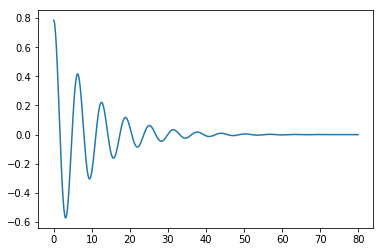

In [27]:
dt=.1;   
wo=1. ;
A=1;
gamma=.1;
finalTime=80;
noTimeSteps = floor(finalTime/dt) ;
w = np.zeros(noTimeSteps) ;
theta = np.zeros(noTimeSteps);
t=np.zeros(noTimeSteps);
theta0=0;
w0=0;
w[0]=w0 ;
theta[0]=45.*pi/180. ;
t[0]=0. ;
def ac(th,ww):
    return wo*wo*th+2*gamma*ww;
for i in range(1,noTimeSteps,1):      
     theta[i] = theta[i-1] + w[i-1]*dt-.5*dt*dt*ac(theta[i-1],w[i-1]);
     w[i] = w[i-1] - dt*.5*(ac(theta[i-1],w[i-1])+ac(theta[i],w[i-1]));
     t[i]=i*dt;
plt.plot(t,theta);
plt.show()

#### Is the damp exponential? 

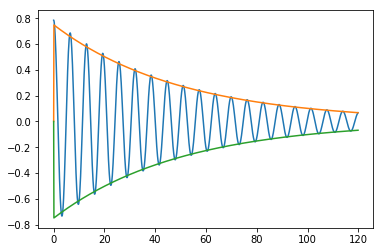

In [29]:
dt=.1;   
wo=1. ;
A=1;
gamma=.02;
finalTime=120;
noTimeSteps = floor(finalTime/dt) ;
w = np.zeros(noTimeSteps) ;
theta = np.zeros(noTimeSteps);
t=np.zeros(noTimeSteps);
expp=np.zeros(noTimeSteps);
expm=np.zeros(noTimeSteps);
theta0=0;
w0=0;
w[0]=w0 ;
theta[0]=45.*pi/180. ;
t[0]=0. ;
def ac(th,ww):
    return wo*wo*np.sin(th)+2*gamma*ww;
for i in range(1,noTimeSteps,1):      
     theta[i] = theta[i-1] + w[i-1]*dt-.5*dt*dt*ac(theta[i-1],w[i-1]);
     w[i] = w[i-1] - dt*.5*(ac(theta[i-1],w[i-1])+ac(theta[i],w[i-1]));
     t[i]=i*dt;
     expp[i]= .75*np.exp(-gamma*t[i]); 
     expm[i]= -.75*np.exp(-gamma*t[i]); 

plt.plot(t,theta, t,expp,t,expm);
plt.show()

####  Adding a periodic forcing. Starting with a $\omega_f=.1$ and $A=F_o/m=.1$
Changed the time of integration to be longer.

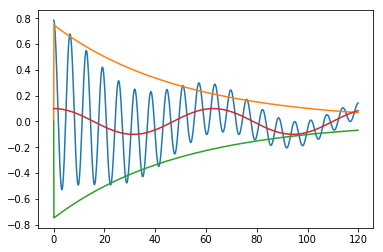

In [33]:
dt=.1;  
wo=1. ;
A=.1;
wf=.1;
gamma=.02;
finalTime=120;
noTimeSteps = floor(finalTime/dt) ;
w = np.zeros(noTimeSteps) ;
theta = np.zeros(noTimeSteps);
t=np.zeros(noTimeSteps);
expp=np.zeros(noTimeSteps);
expm=np.zeros(noTimeSteps);
theta0=0;
w0=0;
w[0]=w0 ;
theta[0]=45.*pi/180. ;
t[0]=0. ;
def ac(th,ww,tt):
    return wo*wo*np.sin(th)+2*gamma*ww-A*np.cos(wf*tt);
for i in range(1,noTimeSteps,1):      
     theta[i] = theta[i-1] + w[i-1]*dt-.5*dt*dt*ac(theta[i-1],w[i-1],t[i-1]);
     w[i] = w[i-1] - dt*.5*(ac(theta[i-1],w[i-1],t[i-1])+ac(theta[i],w[i-1],t[i-1]));
     t[i]=i*dt;
     expp[i]= .75*np.exp(-gamma*t[i]); 
     expm[i]= -.75*np.exp(-gamma*t[i]); 

plt.plot(t,theta, t,expp,t,expm,t,A*np.cos(wf*t));
plt.show()

#### Trying to induce resonance: decrease the damping force __and__ the forcing frequency is closer to the natural frequency of the oscillator. (i.e. $\omega_f \backsim \omega_o $).
#### Calculating the maximum amplitude once the system reaches steady state

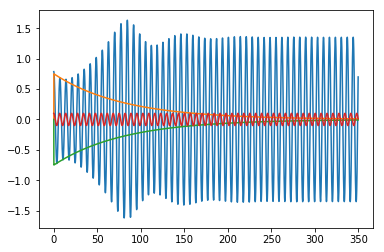

1.3610349070328636


In [31]:
dt=.1;    
wo=1. ;
A=.1;
wf=.92;
gamma=.025;
finalTime=350;
noTimeSteps = floor(finalTime/dt) ;
w = np.zeros(noTimeSteps) ;
theta = np.zeros(noTimeSteps);
t=np.zeros(noTimeSteps);
expp=np.zeros(noTimeSteps);
expm=np.zeros(noTimeSteps);
theta0=0;
w0=0;
w[0]=w0 ;
theta[0]=45.*pi/180. ;
t[0]=0. ;
max=0;
def ac(th,ww,tt):
    return wo*wo*np.sin(th)+2*gamma*ww-A*np.cos(wf*tt);
    # return wo*wo*th+gamma*ww-A*np.cos(wf*tt);

for i in range(1,noTimeSteps,1):      
     theta[i] = theta[i-1] + w[i-1]*dt-.5*dt*dt*ac(theta[i-1],w[i-1],t[i-1]);
     w[i] = w[i-1] - dt*.5*(ac(theta[i-1],w[i-1],t[i-1])+ac(theta[i],w[i-1],t[i-1]));
     t[i]=i*dt;
     expp[i]= .75*np.exp(-gamma*t[i]/2); 
     expm[i]= -.75*np.exp(-gamma*t[i]/2); 
     if (t[i] > 200):
         if(theta[i]>max):
            max=theta[i];

plt.plot(t,theta, t,expp,t,expm,t,A*np.cos(wf*t));
plt.show();
print(max);

Analytically one can obtain that the amplitude of oscillation as a function of the forcing frequency is $ Amp = \frac {A} {\sqrt{(\omega_f^2-\omega_o^2)^2 +4 \gamma^2\omega_f^2 }}$
You can see that as $\omega_f$ is close to $\omega_o$ the amplitude of the oscillation will grow.
#### Ploting the amplitude from the equation AND the one obtained from the simulation as a function of $\omega_f$ varying it from 0 to 2. (ananlytical vs numerical solution)

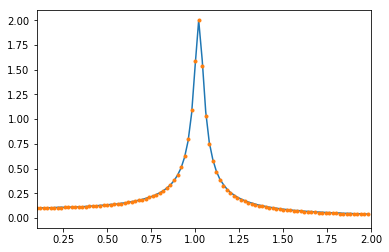

0.04026477867175625


In [35]:
dt=.1;   
wo=1. ;
A=.1;

gamma=.025;  #.5
finalTime=350;
noTimeSteps = floor(finalTime/dt) ;

def ac(th,ww,tt):
    return wo*wo*th+2*gamma*ww-A*np.cos(wf*tt);
wfn=np.zeros(100);
wfn[0]=0;
dwf=.02;
ampl=np.zeros(100);
ampla=np.zeros(100);

for ii in range(1,100,1):
    wf=wfn[ii-1];
    wfn[ii]=(ii)*dwf;
    w = np.zeros(noTimeSteps) ;
    theta = np.zeros(noTimeSteps);
    t=np.zeros(noTimeSteps);
    expp=np.zeros(noTimeSteps);
    expm=np.zeros(noTimeSteps);
    theta0=0;
    w0=0;
    w[0]=w0 ;
    theta[0]=45.*pi/180. ;
    t[0]=0. ;
    max=0;

    for i in range(1,noTimeSteps,1):      
        theta[i] = theta[i-1] + w[i-1]*dt-.5*dt*dt*ac(theta[i-1],w[i-1],t[i-1]);
        w[i] = w[i-1] - dt*.5*(ac(theta[i-1],w[i-1],t[i-1])+ac(theta[i],w[i-1],t[i-1]));
        t[i]=i*dt;
        
        if (t[i] > 200):
            if(theta[i]>max):
                max=theta[i];
    ampl[ii]=max;
    ampla[ii]=A/np.sqrt((wf*wf-wo*wo)**2+4*gamma*gamma*wf*wf);
    
plt.xlim(.1,2);
plt.plot(wfn,ampl,wfn,ampla,'.');
plt.show();
print(max);

#### Comparing this amplitude resonance curve for varying damping force
varying $\gamma$ from 0.625 to 0.025


0.525
0.42500000000000004
0.32500000000000007
0.22500000000000006
0.12500000000000006
0.02500000000000005


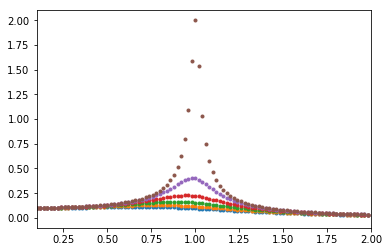

0.0299099825939515


In [14]:
dt=.1;   
wo=1. ;
A=.1;

gamma=.525;
finalTime=350;
noTimeSteps = floor(finalTime/dt) ;

def ac(th,ww,tt):
    return wo*wo*th+2*gamma*ww-A*np.cos(wf*tt);
wfn=np.zeros(100);
wfn[0]=0;
dwf=.02;
ampl=np.zeros(100);
ampla=np.zeros((6,100));

for ii in range(1,100,1):
    wf=wfn[ii-1];
    wfn[ii]=(ii)*dwf;
    w = np.zeros(noTimeSteps) ;
    theta = np.zeros(noTimeSteps);
    t=np.zeros(noTimeSteps);
    expp=np.zeros(noTimeSteps);
    expm=np.zeros(noTimeSteps);
    theta0=0;
    w0=0;
    w[0]=w0 ;
    theta[0]=45.*pi/180. ;
    t[0]=0. ;
    max=0;
    for i in range(1,noTimeSteps,1):      
        theta[i] = theta[i-1] + w[i-1]*dt-.5*dt*dt*ac(theta[i-1],w[i-1],t[i-1]);
        w[i] = w[i-1] - dt*.5*(ac(theta[i-1],w[i-1],t[i-1])+ac(theta[i],w[i-1],t[i-1]));
        t[i]=i*dt;
        
        if (t[i] > 200):
            if(theta[i]>max):
                max=theta[i];
    ampl[ii]=max;
    ampla[0,ii]=A/np.sqrt((wf*wf-wo*wo)**2+4*gamma*gamma*wf*wf);
print(gamma);

for j in range(1,6):
    gamma=gamma-.1;
    print(gamma);
    wf=-dwf;
    for ii in range(0,100):
        wf=wf+dwf
        ampla[j,ii]=A/np.sqrt((wf*wf-wo*wo)**2+4*gamma*gamma*wf*wf);

plt.xlim(.1,2);
for i in range(0,6):
    plt.plot(wfn,ampla[i,],'.');
plt.show();
print(max);

0.625
0.525
0.42500000000000004
0.32500000000000007
0.22500000000000006
0.12500000000000006
0.02500000000000005


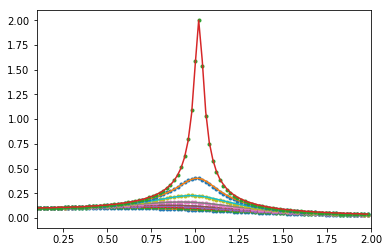

0.040264778671756124


In [20]:
dt=.1;   # step for Euler    #Note: we can NOT use any value we wantw
wo=1. ;
A=.1;

gamma=.725;
finalTime=350;
noTimeSteps = floor(finalTime/dt) ;

def ac(th,ww,tt):
    return wo*wo*th+2*gamma*ww-A*np.cos(wf*tt);
ampl=np.zeros((7,100));
ampla=np.zeros((7,100));
for k in range(0,7):
    gamma=gamma-.1
    wfn=np.zeros(100);
    wfn[0]=0;
    dwf=.02;


    for ii in range(1,100,1):
        wf=wfn[ii-1];
        wfn[ii]=(ii)*dwf;
        w = np.zeros(noTimeSteps) ;
        theta = np.zeros(noTimeSteps);
        t=np.zeros(noTimeSteps);
        expp=np.zeros(noTimeSteps);
        expm=np.zeros(noTimeSteps);
        theta0=0;
        w0=0;
        w[0]=w0 ;
        theta[0]=45.*pi/180. ;
        t[0]=0. ;
        max=0;
        for i in range(1,noTimeSteps,1):      
            theta[i] = theta[i-1] + w[i-1]*dt-.5*dt*dt*ac(theta[i-1],w[i-1],t[i-1]);
            w[i] = w[i-1] - dt*.5*(ac(theta[i-1],w[i-1],t[i-1])+ac(theta[i],w[i-1],t[i-1]));
            t[i]=i*dt;
             
            if (t[i] > 200):
                if(theta[i]>max):
                   max=theta[i];
        ampl[k,ii]=max;
        ampla[k,ii]=A/np.sqrt((wf*wf-wo*wo)**2+4*gamma*gamma*wf*wf);
    print(gamma);

#for j in range(1,6):
#    gamma=gamma-.1;
#    print(gamma);
#    wf=-dwf;
#    for ii in range(0,100):
#        wf=wf+dwf
#        ampla[j,ii]=A/np.sqrt((wf*wf-wo*wo)**2+4*gamma*gamma*wf*wf);

plt.xlim(.1,2);
for i in range(0,7):
    plt.plot(wfn,ampla[i,],'.',wfn,ampl[i,]);
plt.show();
print(max);

#### Since the maximum of the last curve is too large, here are the first 5 curves. 

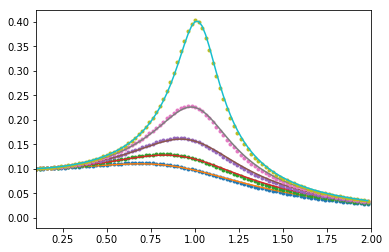

In [19]:
plt.xlim(.1,2);
for i in range(0,5):
    plt.plot(wfn,ampla[i,],'.',wfn,ampl[i,]);
plt.show();